In [132]:
%matplotlib inline

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nb
import numpy as np

In [176]:
data_dir = "/home/julia/projects/real_data/mouse_visual/CL181030fmrssouris2/processed/func/30/"
sos_file = data_dir + "data_mag_tsnr.nii.gz"
real_file = data_dir + "data_real_tsnr.nii.gz"
mask_file = data_dir + "func_mask.nii.gz"

In [177]:
tsnr_real = nb.load(real_file).get_data()
tsnr_sos = nb.load(sos_file).get_data()
mask = nb.load(mask_file).get_data()

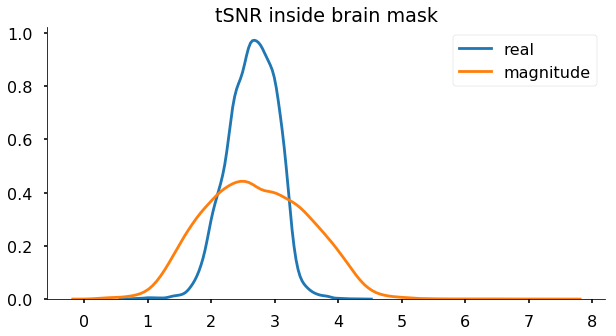

In [178]:
sns.set_context('poster')
fig=plt.figure(figsize=(10,5))
sns.kdeplot(tsnr_real[np.where(mask==1)].flatten(), label='real')
sns.kdeplot(tsnr_sos[np.where(mask==1)].flatten(), label='magnitude')
plt.legend()
plt.title('tSNR inside brain mask')
sns.despine()

In [179]:
print(np.median(tsnr_real[np.where(mask==1)]))
print(np.median(tsnr_sos[np.where(mask==1)]))

2.6668002667
2.68360929331


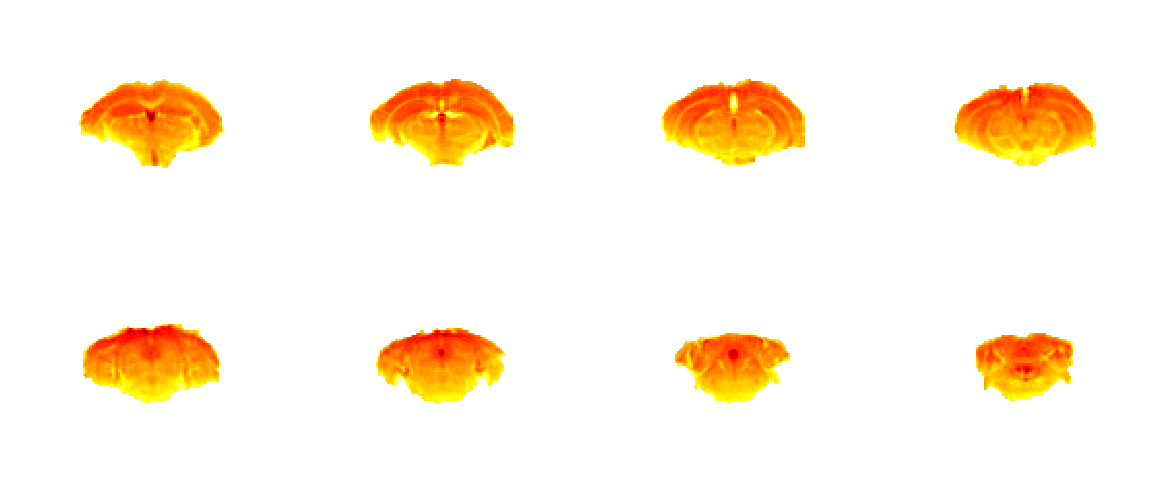

In [180]:
fig = plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(tsnr_real.shape[2]):
    fig.add_subplot(2,4,i+1)
    plt.imshow(tsnr_real[:,:,i].T, cmap='hot_r', vmin=1, vmax=5);
    plt.axis('off');

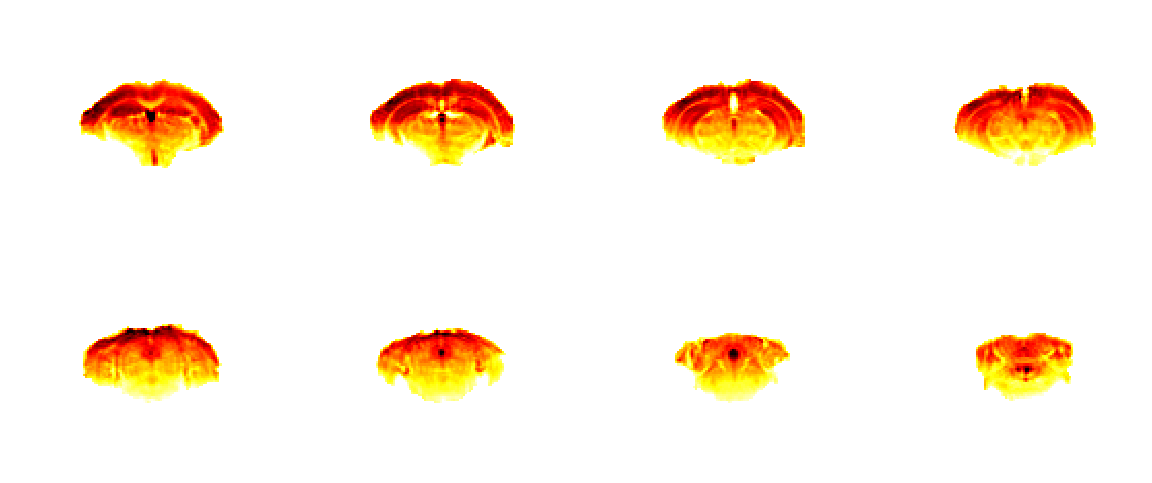

In [181]:
fig = plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(tsnr_real.shape[2]):
    fig.add_subplot(2,4,i+1)
    plt.imshow(tsnr_sos[:,:,i].T, cmap='hot_r', vmin=1, vmax=5);
    plt.axis('off');

Text(0.5,1,'Magnitude')

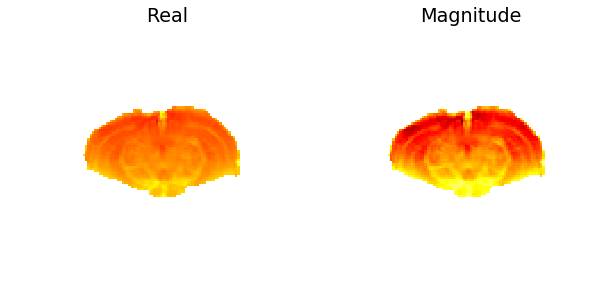

In [182]:
fig = plt.figure(figsize=(10,4))

plt.tight_layout()
fig.add_subplot(1,2,1)
plt.imshow(tsnr_real[:,:,3].T, cmap='hot_r', vmin=0, vmax=6);
plt.axis('off')
plt.title('Real')

fig.add_subplot(1,2,2)
plt.imshow(tsnr_sos[:,:,3].T, cmap='hot_r', vmin=0, vmax=6);
plt.axis('off')
plt.title('Magnitude')

In [78]:
sos_ts_file = data_dir + "data_sos.nii.gz"
real_ts_file = data_dir + "data_real.nii.gz"

In [112]:
real_ts = nb.load(real_ts_file).get_data()
added_ts = nb.load(added_ts_file).get_data()
sos_ts = nb.load(sos_ts_file).get_data()

<IPython.core.display.Javascript object>


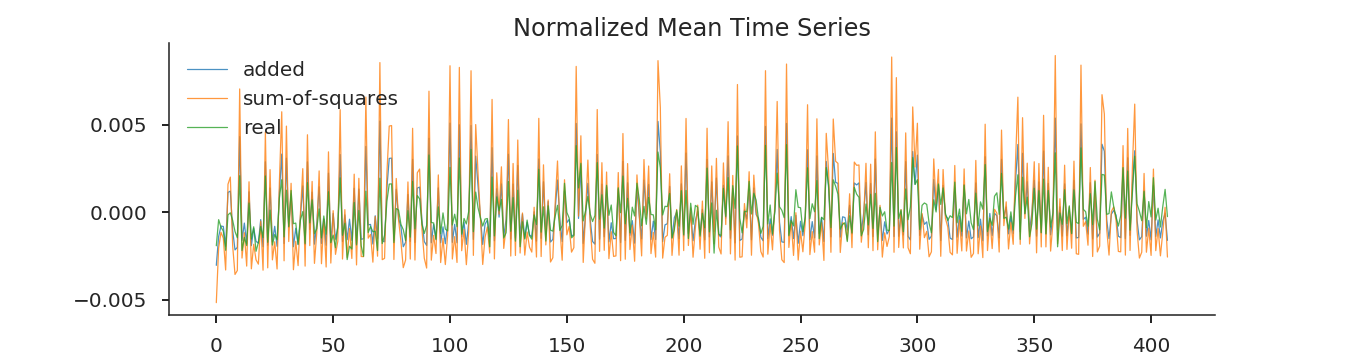

In [147]:
%matplotlib notebook

plt.show()
fig=plt.figure(figsize=(15,4))
plt.plot((np.average(np.average(np.average(added_ts, axis=0), axis=0),axis=0)-np.mean(added_ts))/np.var(added_ts), label='added', linewidth=1, alpha=0.8)
plt.plot((np.average(np.average(np.average(sos_ts, axis=0), axis=0),axis=0)-np.mean(sos_ts))/np.var(sos_ts), label='sum-of-squares', linewidth=1,alpha=0.8)
plt.plot(-(np.average(np.average(np.average(real_ts, axis=0), axis=0),axis=0)-np.mean(real_ts))/np.var(real_ts), label='real', linewidth=1,alpha=0.8)
plt.legend()
plt.title("Normalized Mean Time Series")
sns.despine()
plt.show()

In [47]:
norm=np.genfromtxt("/home/julia/projects/real_data/mouse_visual/CL181030fmrssouris3/processed/func/26/real/confounds/norm.func_moco.txt")

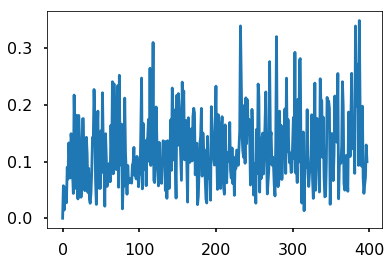

In [48]:
plt.plot(norm)